In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

## Test DataFrame

In [62]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15, 13, 32, 24, 56, 25, 42, 13, 25, 1, 1, 1, 1, 2, 3, 4]
temp_df = pd.DataFrame({"test":a})
temp_df.head()

,test
0,1
1,2
2,3
3,4
4,5


In [25]:
# 왜도 양수 -> 오른쪽으로 긴꼬리 + 데이터가 왼쪽에 분포
temp_df.skew()

test    2.182136
dtype: float64

<AxesSubplot: xlabel='test', ylabel='Density'>

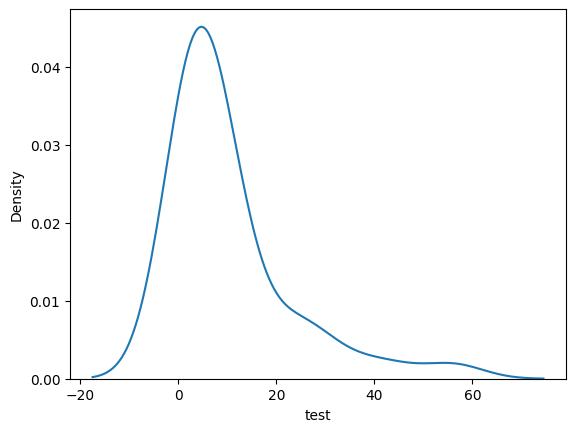

In [26]:
sns.kdeplot(data=temp_df, x="test")

In [27]:
from scipy.stats import skew, norm

# +=1 후 boxcox 변환
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax, boxcox

In [28]:
temp_df.values

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [11],
       [15],
       [13],
       [32],
       [24],
       [56],
       [25],
       [42],
       [13],
       [25],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 3],
       [ 4]])

In [29]:
np.squeeze(temp_df.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 11, 15, 13, 32, 24, 56, 25, 42, 13, 25,  1,  1,  1,  1,  2,  3,
        4])

In [42]:
# Returns
# boxcox : ndarray, Box-Cox power transformed array.
# maxlog : float, optional, If the lmbda parameter is None, the second returned argument is the lmbda that maximizes the log-likelihood function.
y, lambda_optimal = boxcox(np.squeeze(temp_df.values))
y, lambda_optimal

(array([0.        , 0.68283594, 1.07285971, 1.34545741, 1.55457164,
        1.72393505, 1.86608904, 1.98846285, 2.09581773, 0.        ,
        0.68283594, 1.07285971, 1.34545741, 1.55457164, 1.72393505,
        1.86608904, 1.98846285, 2.09581773, 2.27746376, 2.55512389,
        2.42747949, 3.21793124, 2.96883361, 3.69368031, 3.00436991,
        3.45055347, 2.42747949, 3.00436991, 0.        , 0.        ,
        0.        , 0.        , 0.68283594, 1.07285971, 1.34545741]),
 -0.043354029427530444)

In [44]:
y

array([0.        , 0.68283594, 1.07285971, 1.34545741, 1.55457164,
       1.72393505, 1.86608904, 1.98846285, 2.09581773, 0.        ,
       0.68283594, 1.07285971, 1.34545741, 1.55457164, 1.72393505,
       1.86608904, 1.98846285, 2.09581773, 2.27746376, 2.55512389,
       2.42747949, 3.21793124, 2.96883361, 3.69368031, 3.00436991,
       3.45055347, 2.42747949, 3.00436991, 0.        , 0.        ,
       0.        , 0.        , 0.68283594, 1.07285971, 1.34545741])

<AxesSubplot: ylabel='Density'>

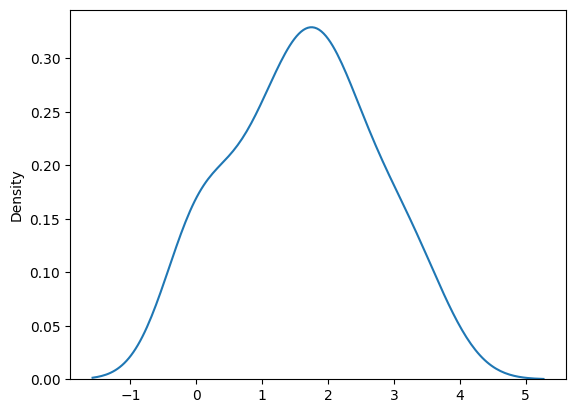

In [45]:
sns.kdeplot(y)

0    2.182136
dtype: float64


<AxesSubplot: ylabel='Density'>

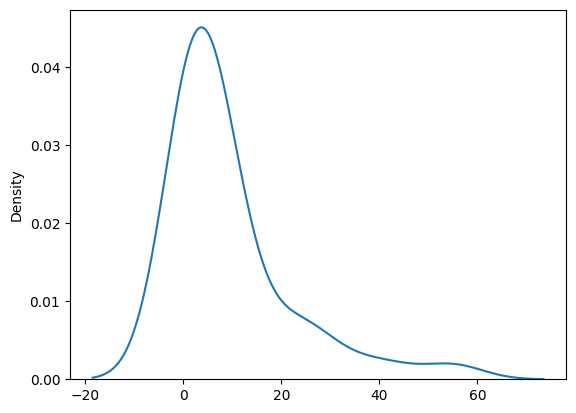

In [58]:
box = boxcox(np.squeeze(temp_df.values), lmbda=1)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

0    0.104564
dtype: float64


<AxesSubplot: ylabel='Density'>

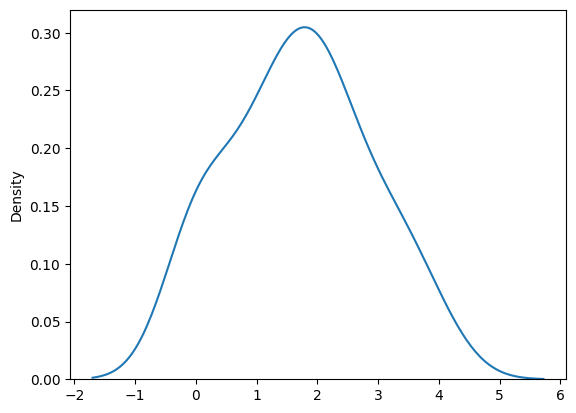

In [59]:
box = boxcox(np.squeeze(temp_df.values), lmbda=0)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

0   -1.300517
dtype: float64


<AxesSubplot: ylabel='Density'>

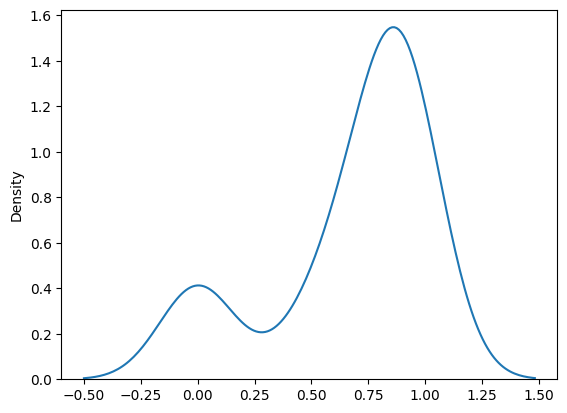

In [60]:
box = boxcox(np.squeeze(temp_df.values), lmbda=-1)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

0    3.657657
dtype: float64


<AxesSubplot: ylabel='Density'>

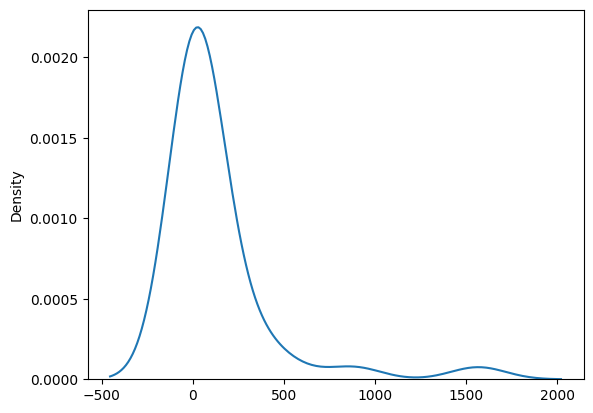

In [61]:
box = boxcox(np.squeeze(temp_df.values), lmbda=2)
print(pd.DataFrame(box).skew())
sns.kdeplot(box)

In [63]:
box1p = boxcox1p(np.squeeze(temp_df.values), lmbda=2)
print(pd.DataFrame(box1p).skew())
sns.kdeplot(box1p)

TypeError: boxcox1p() takes from 2 to 3 positional arguments but 1 were given